# Initial analysis
This notebook is intended to get a first rough view of the data being handheld.

Unlike the notebook [preliminary_info](preliminary_info.ipynb), here an analytical perspective is adopted.
It is intended as the first analytical view of the data.

In [1]:
import shutil
shutil.which("python")

'/Users/ghostsnstuff/Documents/MAPi/Y1/curricular/Knowledge Discovery from Databases/projects/mapi-kdd-class/venv/bin/python'

In [2]:
import pandas as pd
from pandas.api.types import infer_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seed = 101101011
str_block_sep = '***************************************'

base_dir = ".."
base_output_dir = base_dir + "/doc/preliminary_analysis"

save_outputs = False

In [3]:
def save_output_file(msg, filename, save_dir=None, fileextension='.txt', override=False):
    write_mode = 'w' if override else 'a'
    if save_dir is None:
        output_file = base_output_dir + '/' + filename + fileextension
    else:
        output_file = save_dir + '/' + filename + fileextension
        
    with open(output_file, write_mode) as f:
        print(msg, file = f)
        
def save_output_plots(pltname, save_dir=None, pltextension=".svg"):
    if save_dir is None:
        plot_dir = base_output_dir + '/plots/' + pltname + pltextension
    else:
        plot_dir = save_dir + '/' + pltname + pltextension
        
    plt.savefig(plot_dir, transparent=True, bbox_inches='tight')

In [4]:
train = pd.read_csv(base_dir + '/data/train.csv')
# test = pd.read_csv(base_dir + '/data/test.csv')

Note: must divide numerical and categorical variable analysis

Preliminary analysis regarding train data
***************************************
Distribution of the target value ('y') in the training set
0    3753
1    2079
Name: y, dtype: int64
0    0.643519
1    0.356481
Name: y, dtype: float64
Variables with NA values:
['x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x21', 'x22', 'x23', 'x24', 'x37']
Variables with NA values:
{'x3': 4, 'x4': 8, 'x5': 4, 'x6': 8, 'x7': 3, 'x8': 2, 'x9': 92, 'x10': 104, 'x11': 1, 'x12': 3, 'x13': 2163, 'x14': 2151, 'x15': 1056, 'x16': 1066, 'x17': 1633, 'x18': 1643, 'x19': 1, 'x21': 390, 'x22': 378, 'x23': 422, 'x24': 413, 'x37': 25}

Variables cross correlations maximum values:
Positive:
            i         y        x1        x2        x3        x4        x5  \
x1  -0.078994  0.074961  1.000000  0.997602  0.903080  0.897462  0.862392   
x2  -0.078063  0.076312  0.997602  1.000000  0.907443  0.903065  0.863763   
x9  -0.060745  0.067119  0.934521 

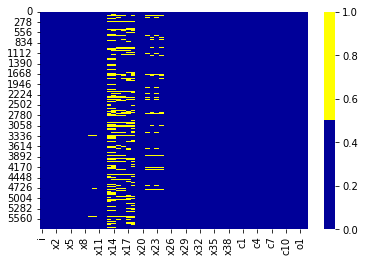

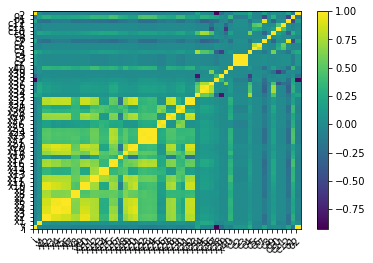

In [5]:
# distribution of the target
tgt_distr = train['y'].value_counts()

tgt_distr_message = "Distribution of the target value ('y') in the training set\n{}\n{}".format(tgt_distr, tgt_distr/len(train))

# types of variables
train_cols = train.columns
train_col_types = [infer_dtype(train[col_name]) for col_name in train_cols]

## from the docs - x -> continuous variable, o -> ordinal variable, c -> categorical variable
num_col_names = [name for name in train_cols.tolist() if name.startswith('x')]
cat_col_names = [name for name in train_cols.tolist() if name.startswith('c')]
ord_col_names = [name for name in train_cols.tolist() if name.startswith('o')]

## or manually
#num_cols = train_cols[2:42]
#cat_cols = train_cols[42:54]
#ord_cols = train_cols[54:56]

# NAs
# manually
#var_nas = ''
#for var in train.columns:
#    count_null = 0
#    count_null = train.loc[:, var].isna().sum()
#    
#    if count_null > 0:
#        var_nas += "Var {} has {} missing values\n".format(var, count_null)

# nas automatic via pandas
nas = train.isna().sum()[train.isna().sum()>0].to_dict()
var_nas = list(nas.keys())

nas_msg = "Variables with NA values:\n{}\n".format(nas)

## visually
colours = ['#000099', '#ffff00']
sns.heatmap(train[train_cols].isnull(), cmap=sns.color_palette(colours))
# plt.show()

if save_outputs:
    save_output_plots('vars_nas_vals')

# duplicate records or variables
# rows
duplicate_records = train.duplicated().sum()

# columns
duplicate_features = train.T.duplicated().sum()

# correlation between variables
vars_cross_correl = train.corr()
vars_correl_to_tgt = train.corr()['y'].sort_index(ascending=False)

vars_correl_max_positive = vars_cross_correl.nlargest(5, num_col_names)
vars_correl_max_negative = vars_cross_correl.nsmallest(5, num_col_names)

vars_correl_to_tgt_max_positive = vars_correl_to_tgt.nlargest(5)
vars_correl_to_tgt_max_negative = vars_correl_to_tgt.nsmallest(5)

# visualize correlations using heatmap
fig, ax = plt.subplots()
heatmap = plt.pcolor(train.corr())
cbar = plt.colorbar(heatmap)
ax.set_xticks(np.arange(len(train.columns)))
ax.set_yticks(np.arange(len(train.columns)))
ax.set_xticklabels(train.columns)
ax.set_yticklabels(train.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

if save_outputs:
    save_output_plots('vars_corr_to_target')

# add vars histograms
    
prt_msg_basic_info = (
    "Preliminary analysis regarding train data\n{}\n"
    "{}\n"
    "Variables with NA values:\n{}\n"
    "{}\n"
    "Variables cross correlations maximum values:\nPositive:\n{}\nNegative:\n{}\n"
    "Variables correlations to target maximum values:\nPositive:\n{}\nNegative:\n{}\n"
    "{}".format(
        str_block_sep,
        tgt_distr_message,
        var_nas,
        nas_msg,
        vars_correl_max_positive, vars_correl_max_negative,
        vars_correl_to_tgt_max_positive, vars_correl_to_tgt_max_negative,
        str_block_sep
    )
)

if save_outputs:
    save_output_file(prt_msg_basic_info, 'output')

print(prt_msg_basic_info)

In [6]:
#test_duplicate_features = train.T.duplicated()
#print(test_duplicate_features)

test_duplicate_records = train.duplicated()[train.duplicated() == False]
print(test_duplicate_records)

0       False
1       False
2       False
3       False
4       False
        ...  
5827    False
5828    False
5829    False
5830    False
5831    False
Length: 5832, dtype: bool


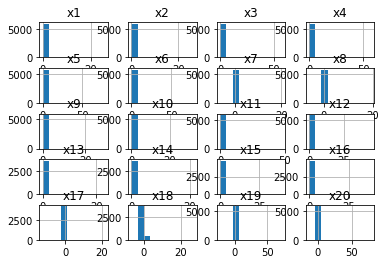

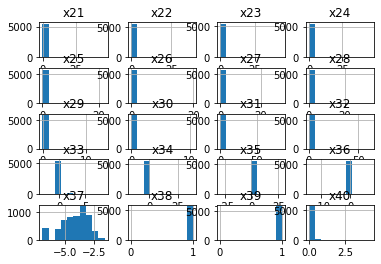

In [7]:
num_var_groups = [num_col_names[0:20], num_col_names[20:40]]

# histograms
for group in num_var_groups:
    train.loc[:, group].hist()
    filename = '{}_to_{}_vars_histogram'.format(group[0], group[-1])
    if save_outputs:
        save_output_plots(filename)

In [8]:
test = pd.read_csv(base_dir + '/data/test.csv')

# nas automatic via pandas
nas_test = test.isna().sum()[test.isna().sum()>0].to_dict()
var_nas_test = list(nas_test.keys())

nas_test_msg = "Variables with NA values:\n{}\n".format(nas_test)

In [9]:
print(nas_test_msg)

Variables with NA values:
{'y': 5834, 'x3': 2, 'x4': 10, 'x5': 2, 'x6': 10, 'x7': 1, 'x8': 2, 'x9': 108, 'x10': 107, 'x12': 1, 'x13': 2186, 'x14': 2156, 'x15': 1071, 'x16': 1087, 'x17': 1609, 'x18': 1635, 'x21': 372, 'x22': 384, 'x23': 405, 'x24': 431, 'x37': 15, 'x40': 3}

